# **Project: Providing data-driven suggestions for HR**


## Project Description and Deliverables 

This project is an opportunity for me to analyze an HR dataset and build predictive models that provide meaningful insights to the Human Resources (HR) department of a large consulting firm. My goal is to develop a model that predicts whether or not an employee is likely to leave the organization, which can help HR improve employee retention strategies.

Upon completing this project, I will produce two final deliverables that I can present to future employers:

1. A one-page summary report that presents the key findings and insights for external stakeholders, written from the perspective of a data professional working at Salifort Motors.

2. A complete code notebook, including all data preparation, exploratory data analysis (EDA), modeling, evaluation, visualizations, and conclusions.

For the modeling approach, I will choose one method either a regression model or a machine learning classification model to predict employee attrition. Although example solutions may show both approaches, I will select and complete only one.

#### My deliverables will include:

Model evaluation results and interpretation 

At least one meaningful data visualization directly related to my research question

Ethical considerations regarding data usage and modeling

A list of resources I used to troubleshoot issues and guide development

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem


In this project, I worked with the HR department at Salifort Motors to help them better understand employee satisfaction and retention. HR had collected a range of employee data but were unsure how to interpret it. They asked me, as a data analytics professional, to analyze the dataset and provide data-driven insights. Their core question was: What factors are most likely to lead an employee to leave the company?

My objective was to explore the data, identify meaningful patterns, and develop a predictive model that determines whether an employee is likely to leave. By building this model, I aimed to highlight the key drivers of turnover so the company can take proactive steps to improve retention. Because recruiting, interviewing, and training new employees is both time-consuming and costly, the ability to anticipate and address potential attrition provides significant value to the organization.

### Familiarize with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

| Variable               | Description                                                   |
|------------------------|---------------------------------------------------------------|
| satisfaction_level     | Employee-reported job satisfaction level (0–1)               |
| last_evaluation        | Score of employee's last performance review (0–1)            |
| number_project         | Number of projects the employee contributes to               |
| average_monthly_hours  | Average number of hours the employee worked per month        |
| time_spend_company     | Employee tenure in years                                     |
| Work_accident          | Whether the employee experienced an accident at work (0/1)   |
| left                   | Whether the employee left the company (0/1)                  |
| promotion_last_5years  | Whether the employee was promoted in the last 5 years (0/1)  |
| Department             | The employee's department                                    |
| salary                 | The employee's salary tier (low, medium, high)               |


## Step 1. Imports

*   Import packages
*   Load dataset



In [26]:

# %pip install xgboost

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [27]:

# Load dataset into a dataframe
df = pd.read_csv("HR_comma_sep.csv")
# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [29]:
df.shape

(14999, 10)

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding  variables
- Cleaning dataset (missing data, redundant data, outliers) 



### Gathering basic information about the data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [31]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

During the data-cleaning process, ensure that all column names are converted to standardized snake_case, corrected for any misspellings, and refined to be as concise as appropriate.

In [32]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [33]:
# Rename columns for better readability
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [34]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [35]:
# Check for duplicates
df.duplicated().sum()

np.int64(3008)

3,008 rows contain duplicates. That is 20% of the data.

In [36]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The output above displays the first five instances of rows that appear as duplicates elsewhere in the dataframe. It is highly unlikely that these represent legitimate, independent entries. In practical terms, the probability that two employees would self report identical values across all columns particularly when several of those columns contain continuous variables is extremely low. While one could conduct a formal likelihood analysis using Bayes’ theorem by multiplying the marginal probabilities of each observed value, such rigor is not necessary here. Given the implausibility of these duplicates being valid observations, it is appropriate to remove them.

In [37]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

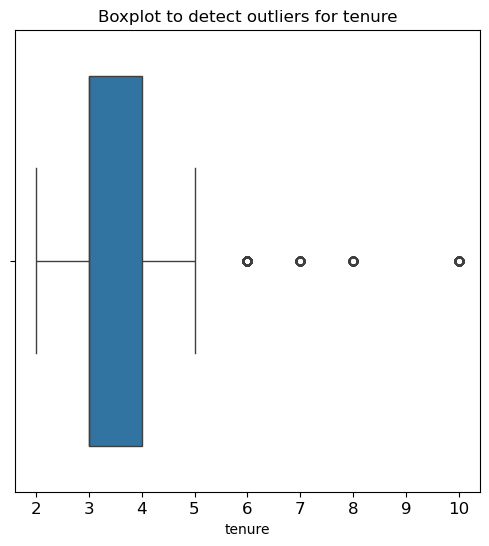

In [38]:
# Created a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot above shows that there are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [39]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
q1 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
q3 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = q3 - q1

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Some models are more sensitive to outliers than others. When you begin modeling, assess whether to remove these outliers depending on the model type you intend to use.